In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook
from multiprocessing import Pool
from tqdm import tqdm
import time
#from pandarallel import pandarallel
model = load_model('i_predict CD_OA')

In [9]:
df1_std = pd.read_csv('CD_OA_std', usecols=[1,2,3,4,5,6,7])
df1_std

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch
0,1.603567,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045
1,1.336306,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045
2,1.069045,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045
3,0.801784,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045
4,0.534522,-1.224765,-1.224745,-1.224745,-1.224745,-1.069045,-1.069045
...,...,...,...,...,...,...,...
346,-0.534522,-1.224765,1.224745,1.224745,1.224745,1.336306,1.336306
347,-0.801784,-1.224765,1.224745,1.224745,1.224745,1.336306,1.336306
348,-1.069045,-1.224765,1.224745,1.224745,1.224745,1.336306,1.336306
349,-1.336306,-1.224765,1.224745,1.224745,1.224745,1.336306,1.336306


In [7]:
df1 = pd.read_csv('CD_OA', usecols=[1,2,3,4,5,6,7,8])
df1

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave
0,1.00,0.0,373.15,1.5,2.0,0.4,0.4,5.038917
1,0.95,0.0,373.15,1.5,2.0,0.4,0.4,22.774963
2,0.90,0.0,373.15,1.5,2.0,0.4,0.4,90.514773
3,0.85,0.0,373.15,1.5,2.0,0.4,0.4,273.058241
4,0.80,0.0,373.15,1.5,2.0,0.4,0.4,606.020874
...,...,...,...,...,...,...,...,...
346,0.60,0.0,393.15,5.5,6.0,1.6,1.6,4478.770497
347,0.55,0.0,393.15,5.5,6.0,1.6,1.6,5426.748374
348,0.50,0.0,393.15,5.5,6.0,1.6,1.6,6384.839712
349,0.45,0.0,393.15,5.5,6.0,1.6,1.6,7311.852510


In [5]:
df_i = pd.read_csv('CD_OA', usecols=[8])

In [10]:
df_i_Pre = model.predict(df1_std)
df_i_Pre

11/11 [==============================] - 0s 3ms/step


array([[-1.10057043e-02],
       [ 2.25587463e+01],
       [ 1.06090836e+02],
       [ 2.98943268e+02],
       [ 6.07229248e+02],
       [ 1.12897668e+03],
       [ 1.74613892e+03],
       [ 2.48848901e+03],
       [ 3.23327295e+03],
       [ 3.99093286e+03],
       [ 4.86574268e+03],
       [ 5.85222949e+03],
       [ 6.89667236e+03],
       [ 5.60232449e+00],
       [ 5.53417206e+01],
       [ 1.84543228e+02],
       [ 4.63083069e+02],
       [ 9.08878418e+02],
       [ 1.51277515e+03],
       [ 2.23085840e+03],
       [ 2.98659985e+03],
       [ 3.81745312e+03],
       [ 4.76629834e+03],
       [ 5.79341357e+03],
       [ 6.85289111e+03],
       [ 7.92479834e+03],
       [ 5.55042305e+01],
       [ 1.23202995e+02],
       [ 3.47104645e+02],
       [ 7.41212097e+02],
       [ 1.29998962e+03],
       [ 1.99604211e+03],
       [ 2.81065918e+03],
       [ 3.72116870e+03],
       [ 4.70748242e+03],
       [ 5.74552490e+03],
       [ 6.80911035e+03],
       [ 7.87457275e+03],
       [ 8.9

In [16]:
def Vstd(V):
 #説明変数Vの平均と標準偏差を出し、求めたいVの値を標準化する。
 global df1
 df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
 V_std = (V-df1["V_cell"].mean())/df1["V_cell"].std()
 return(V_std)

def Pstd(P):
  #説明変数Tの平均と標準偏差を出し、求めたいPの値を標準化する。
 global df1
 df_P = pd.DataFrame([101330.0,202660.0,3093990.0])
 P_std = (P-df1["P_b"].mean())/df1["P_b"].std()
 return(P_std) 

def Tstd(T):
  #説明変数Tの平均と標準偏差を出し、求めたいTの値を標準化する。
 global df1
 df_T = pd.DataFrame([373.15,383.15,393.15])
 T_std = (T-df1["T_cell"].mean())/df1["T_cell"].std()
 return(T_std) 

def EtaAstd(etaA):
  #説明変数Tの平均と標準偏差を出し、求めたいTの値を標準化する。
 global df1
 EtaA_std = (etaA-df1["stoichi_anode"].mean())/df1["stoichi_anode"].std()
 return(EtaA_std) 

def EtaCstd(etaC):
  #説明変数Tの平均と標準偏差を出し、求めたいTの値を標準化する。
 global df1
 EtaC_std = (etaC-df1["stoichi_cathode"].mean())/df1["stoichi_cathode"].std()
 return(EtaC_std) 

def W_chstd(W_ch):
 #説明変数Wの平均と標準偏差を出し、求めたいWの値を標準化する。
 global df1
 W_std = (W_ch-df1["W_ch"].mean())/df1["W_ch"].std()
 return(W_std)

def D_chstd(D_ch):
 #説明変数Wの平均と標準偏差を出し、求めたいWの値を標準化する。
 global df1
 D_std = (D_ch-df1["D_ch"].mean())/df1["D_ch"].std()
 return(D_std)

In [17]:
def I_ave_pre(P,T,EtaA,EtaC,W,D):
 dfPRE = pd.DataFrame(columns=['V_cell','i_ave'])
 
 global df1, df1_std
 df3_std = pd.DataFrame({'P_b':[Pstd(P)],'T_cell':[Tstd(T)],'stoichi_acnode':[EtaAstd(EtaA)],'stoichi_cathode':[EtaAstd(EtaC)],'W_ch':[W_chstd(W)],'D_ch':[D_chstd(W)]})
 for V in np.linspace(0.4,1,100):   #Vの連続値に対応した電流密度を出す
    df5_std = pd.DataFrame({'V[V]':[Vstd(V)]})
    df6_std = pd.concat([df5_std,df3_std], axis=1)
    i_ave_pre = model.predict(df6_std)    #モデルで予測
    new_row = {'V_cell':V,'i_ave':i_ave_pre}
    dfPRE = pd.concat([dfPRE, pd.DataFrame([new_row])], ignore_index=True) #データフレームとして予測値を出力
 
 return dfPRE

1/1 [==============================] - 1s 500ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_6304\197728714.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfPRE = pd.concat([dfPRE, pd.DataFrame([new_row])], ignore_index=True) #データフレームとして予測値を出力


1/1 [==============================] - 0s 16ms/step


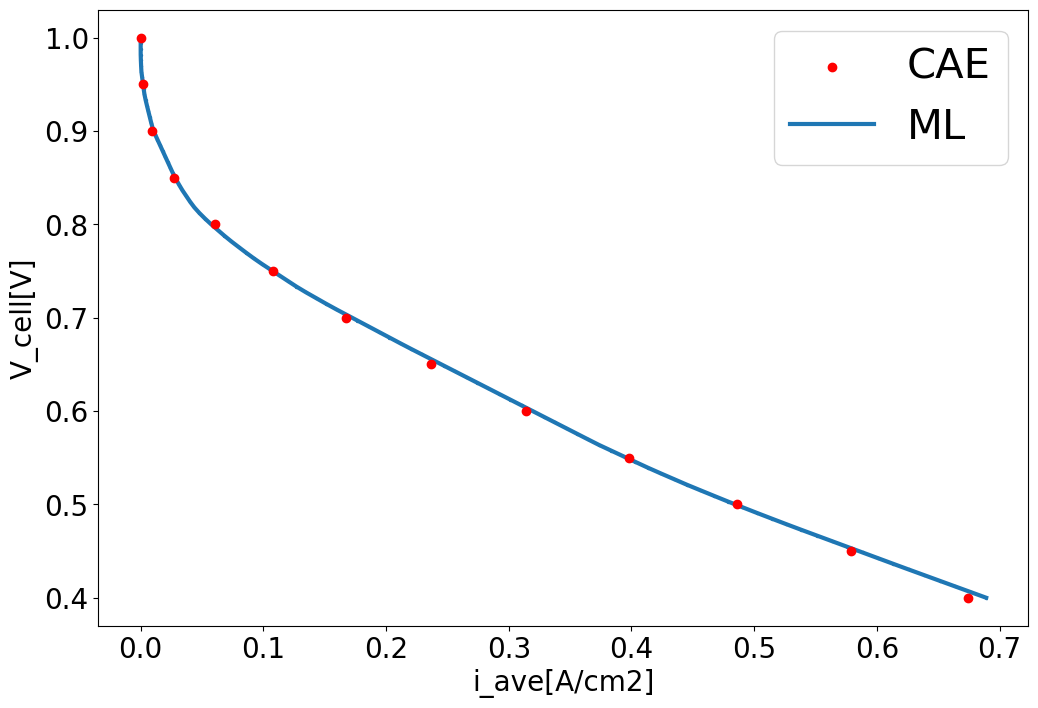

In [26]:
#予測結果の電流密度の平均表示
dfPRE =I_ave_pre(0,373.15,1.5,2,0.4,0.4)
figPRE = plt.figure(figsize=(12, 8))
axPRE = figPRE.add_subplot(111)

#CONSOL結果の表示
dfCOM0 = df1[(df1['P_b']==0) & (df1['T_cell']==373.15) & (df1['stoichi_anode']==1.5) & (df1['stoichi_cathode']==2) &  (df1['W_ch']==0.4) &  (df1['D_ch']==0.4)]
scCOM0 = axPRE.scatter(dfCOM0['i_ave']*1e-4,dfCOM0['V_cell'],color='red',label='CAE')

scPRE = axPRE.scatter(dfPRE['i_ave']*1e-4,dfPRE['V_cell'],s=2,zorder=0)
axPRE.plot(dfPRE['i_ave']*1e-4, dfPRE['V_cell'], linestyle='-', linewidth=3, zorder=0,label='ML') 

# 目盛りのサイズを大きくする
axPRE.tick_params(axis='both', which='major', labelsize=20)
# 凡例を表示
axPRE.legend(fontsize=30)


# 軸ラベルを追加
axPRE.set_xlabel('i_ave[A/cm2]', fontsize=20)
axPRE.set_ylabel('V_cell[V]', fontsize=20)

plt.show()

In [21]:
dfCOM0

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch,i_ave
